In [1]:
import pandas as pd
import numpy as np

In [39]:
daily_students = pd.read_excel(open('Downloads/Case 2 dataset (DailySales).xlsx','rb'), sheet_name='student daily')
daily_staff = pd.read_excel(open('Downloads/Case 2 dataset (DailySales).xlsx','rb'), sheet_name='staff daily')
daily_tourism = pd.read_excel(open('Downloads/Case 2 dataset (DailySales).xlsx','rb'), sheet_name='tourism daily')


In [25]:
hourly= pd.read_excel(open('Downloads/Case 2 dataset (HourlySales).xlsx','rb'), sheet_name='Raw data')


In [26]:
#removing totals
hourly_ts = hourly.iloc[:5136]

# 1) Preparing hourly dataset to daily time series

In [27]:
hourly_ts

,Time,Sales
0,12am Sat 1st Apr 2017,0.0
1,1am Sat 1st Apr 2017,0.0
2,2am Sat 1st Apr 2017,0.0
3,3am Sat 1st Apr 2017,0.0
4,4am Sat 1st Apr 2017,0.0
...,...,...
5131,7pm Tue 31st Oct 2017,58.5
5132,8pm Tue 31st Oct 2017,0.0
5133,9pm Tue 31st Oct 2017,0.0
5134,10pm Tue 31st Oct 2017,0.0


In [28]:
hourly_ts['Time'] =  pd.to_datetime(hourly_ts['Time'])

<ipython-input-28-e0067f9b02d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_ts['Time'] =  pd.to_datetime(hourly_ts['Time'])


In [29]:
hourly_ts

,Time,Sales
0,2017-04-01 00:00:00,0.0
1,2017-04-01 01:00:00,0.0
2,2017-04-01 02:00:00,0.0
3,2017-04-01 03:00:00,0.0
4,2017-04-01 04:00:00,0.0
...,...,...
5131,2017-10-31 19:00:00,58.5
5132,2017-10-31 20:00:00,0.0
5133,2017-10-31 21:00:00,0.0
5134,2017-10-31 22:00:00,0.0


In [ ]:
daily = hourly_ts.groupby(pd.Grouper(freq='D', key='Time')).sum()



We have time series format with date as index and total sales for each date

In [31]:
daily

,Sales
Time,
2017-04-01,2348.00000
2017-04-02,0.00000
2017-04-03,3090.00000
2017-04-04,0.00000
2017-04-05,3840.00000
...,...
2017-10-27,761.00002
2017-10-28,1611.00000
2017-10-29,732.00000


In [165]:
import numpy as np

#Got this method from https://analyticsindiamag.com/tutorial-on-univariate-single-step-style-lstm-in-time-series-forecasting/
def sampling(sequence, n_steps):

    X, Y = list(), list()

    for i in range(len(sequence)):

        sam = i + n_steps
        if sam > len(sequence)-1:
            break

        x, y = sequence[i:sam], sequence[sam]

        X.append(x)

        Y.append(y)

    return np.array(X), np.array(Y)

In [194]:
n_steps = 4

X, Y = sampling(daily['Sales'].tolist(), n_steps)

In [170]:
for i in range(len(X)):

    print(X[i], Y[i])

[2348.    0. 3090.    0.] 3840.0
[   0. 3090.    0. 3840.] 3006.0
[3090.    0. 3840. 3006.] 3046.0
[   0. 3840. 3006. 3046.] 2143.0
[3840. 3006. 3046. 2143.] 0.0
[3006. 3046. 2143.    0.] 2497.0
[3046. 2143.    0. 2497.] 2440.0
[2143.    0. 2497. 2440.] 2310.0
[   0. 2497. 2440. 2310.] 3027.0
[2497. 2440. 2310. 3027.] 0.0
[2440. 2310. 3027.    0.] 1266.0
[2310. 3027.    0. 1266.] 0.0
[3027.    0. 1266.    0.] 1290.0
[   0. 1266.    0. 1290.] 2433.0
[1266.    0. 1290. 2433.] 3127.0
[   0. 1290. 2433. 3127.] 2836.0
[1290. 2433. 3127. 2836.] 2853.0
[2433. 3127. 2836. 2853.] 1477.99999
[3127.      2836.      2853.      1477.99999] 0.0
[2836.      2853.      1477.99999    0.     ] 1707.0
[2853.      1477.99999    0.      1707.     ] 1121.0
[1477.99999    0.      1707.      1121.     ] 2202.0
[   0. 1707. 1121. 2202.] 2334.99998
[1707.      1121.      2202.      2334.99998] 1810.0
[1121.      2202.      2334.99998 1810.     ] 1998.0
[2202.      2334.99998 1810.      1998.     ] 0.0
[2334.999

In [32]:
#check for missing

daily.isnull().any()

Sales    False
dtype: bool

In [33]:
#data distribution
daily.describe()

,Sales
count,214.000000
mean,1444.035046
std,752.709611
min,0.000000
25%,1112.000000
50%,1402.000000
75%,1808.500000
max,3840.000000


# 2)

In [41]:
daily_students['Date'] =  pd.to_datetime(daily_students['Date'])
daily_staff['Product'] =  pd.to_datetime(daily_staff['Product'])
daily_tourism['Date'] =  pd.to_datetime(daily_tourism['Date'])

# Daily Students 

The revenue generated by each flavour is listed in decending order. S. Caramel is the flavour with highest revenue of 25201, followed by mint choco and mango st. 

Stamp card, gift voucher, triple and double scoop result in negative revenue

In [63]:
daily_students.groupby(pd.Grouper(freq='Y', key='Date')).sum().max().sort_values(ascending=False)

S. Caramel St                25201.79338
Mint Choco  St               14861.04761
Mango St                     14128.30953
Chocolate St                 13906.33333
Pure Coco . St               13570.33333
Strawberry St                11541.50000
Chai Tea st                   9952.83333
Hazelnut St                   9824.66666
Green Tea St                  9667.50000
Banana Caramel St             9197.49999
Waffle Cone St                8707.51613
Pina Colada St                5301.50000
IceCream Sand St              5010.00000
Coffee  St                    4938.33333
Vanilla Bean St               4937.50000
Cherry Almond Fudge st        4570.99999
YY Seasame St                 4363.50001
Apricot ST                    2054.00000
Red Bean St                   1896.33334
Lime Coconut ST               1661.50001
Ginger St                      988.00000
Pistachio St                   702.00000
1 Toppings St                  333.00000
Up 3 Toppings  ST              196.00000
Cus. IC Sand St 

In [65]:
#students had total revenue of 166199.99

daily_students.groupby(pd.Grouper(freq='Y', key='Date')).sum().max().sum()

166199.99997

# Daily Staff


The revenue generated by each flavour is listed in decending order. S. Caramel is the flavour with highest revenue of 10226.21211, followed by mango and chocolate. 

triple and double scoop result in negative revenue

In [67]:
daily_staff.groupby(pd.Grouper(freq='Y', key='Product')).sum().max().sort_values(ascending=False)

S. Caramel Staff        10226.21211
Mango Staff              8030.09090
Chocolate Staff          6863.87878
Pure Coconut Staff       5729.09090
Mint Choco Staff         5542.87878
Strawberry Staff         5426.75757
Waffle Cone Staff        4079.50000
Chai Tea Staff           3986.59090
Hezelnut Staff           3296.21212
Green Tea Staff          3056.59090
Pina Colada Staff        2787.87878
Coffee Staff             2575.54545
Banana Staff             2546.21211
YY Seasame Staff         2309.54545
Vanilla Bean Staff       2273.25757
Ice Cream Sand Staff     1836.00000
Cherry Alm Staff         1769.54545
Apricot Staff            1440.00000
Red Bean Staff           1342.21211
Lime Coconut Staff        990.00000
Pistachio Staff           870.00000
Ginger Staff              840.00000
1 Topping Staff           131.00000
Cus IC Sand Staff          84.00000
3 Topping Staff            56.00000
Single Scoop Staff          0.00000
Tub Staff                   0.00000
Triple Scoop Staff       -34

In [69]:
#staff had total revenue of 73816.99988

daily_staff.groupby(pd.Grouper(freq='Y', key='Product')).sum().max().sum()

73816.99988

# Daily Tourism


The revenue generated by each flavour is listed in decending order.Mango is the flavour with highest revenue of 4310.83334, followed by Chocolate and Strawberry. 

Gift coupon 3 cone, triple scoop, Finger B 100,and Double Scoop result in negative revenue

In [71]:
daily_tourism.groupby(pd.Grouper(freq='Y', key='Date')).sum().max().sort_values(ascending=False)

Mango                 4310.83334
Chocolate             3999.24528
Strawberry            3760.00000
S. Caramel            3560.00000
Pure Coco .           3240.00000
Mint Choco            2560.00000
Waffle Cone           2326.01572
Green Tea             2200.00000
Hazelnut              2040.00000
Vanilla Bean          1640.00000
Chai Tea              1520.00000
Pina Colada           1280.00000
Banana Caramel  /     1240.00000
Coffee                1200.00000
Cherry Almond         1160.00000
YY Seasame             920.00000
Lime Coconut           800.00000
Chocoate Cookies       675.00000
Ice Cream SAND         405.00000
Red Bean               360.00000
Ginger                 320.00000
Miscellenous           293.00000
Granola                100.00000
Apricot                 80.00000
1 Topping               79.90566
3 Topping               20.00000
Single Scoop             0.00000
Tub Ice Cream            0.00000
Gift coupon 3 cone    -261.00000
Triple Scoop          -280.00000
Finger B 1

In [73]:
#tourism had total revenue of 73816.99988

daily_tourism.groupby(pd.Grouper(freq='Y', key='Date')).sum().max().sum()

37388.0

In [74]:
37388.0 + 73816.99988 + 166199.99997


277404.99985

# Summary

Total sales are: 277404.99985

where students are 166199.99997,
staff are 73816.99988
and tourism is 37388.0

S carmal, mango, chocolate are some of the top falvours and double and triple scoop always results in negative revenue

# 3)

In [78]:
daily_students.columns

Index(['Date', '1 Toppings St', 'Apricot ST', 'Banana Caramel St',
       'Chai Tea st', 'Cherry Almond Fudge st', 'Chocolate St', 'Coffee  St',
       'Cus. IC Sand St', 'Double Scoop ST', 'Gift Voucher ST', 'Ginger St',
       'Green Tea St', 'Hazelnut St', 'IceCream Sand St', 'Lime Coconut ST',
       'Mango St', 'Mint Choco  St', 'Pina Colada St', 'Pistachio St',
       'Purchase  Gift Voucher st', 'Pure Coco . St', 'Red Bean St',
       'S. Caramel St', 'Single Scoop ST', 'Stamp Card REDEEM ST',
       'Strawberry St', 'Triple Scoop ST', 'Tub Ice Cream ST',
       'Up 3 Toppings  ST', 'Vanilla Bean St', 'Waffle Cone St',
       'YY Seasame St'],
      dtype='object')

# Groups

Favlours -

Fruit Flavour: Apricot, Cherry Almond Fudge, Mango, Pistachio, Strawberry

Drink Flavour: Chai Tea, Coffee, Green Tea 

Chocolate: Chocolate, Mint Choco, Pure coco

Tropical: Lime coconut, Pina colada, Red Bean, Vinilla, ginger

Caramel: Banana Caramel, Caramel

Nuts: Hazelnut, Cherry Almond Fudge st, Seasame


Topping -

1 topping, up 3 topping

Size:

Single scoop, double scoop, triple scoop, tub ice cream, sandwitch, cone



In [79]:
daily_staff.rename(columns = {'Product':'Date'}, inplace = True)


In [87]:
daily_students.columns

Index(['Date', '1 Toppings St', 'Apricot ST', 'Banana Caramel St',
       'Chai Tea st', 'Cherry Almond Fudge st', 'Chocolate St', 'Coffee  St',
       'Cus. IC Sand St', 'Double Scoop ST', 'Gift Voucher ST', 'Ginger St',
       'Green Tea St', 'Hazelnut St', 'IceCream Sand St', 'Lime Coconut ST',
       'Mango St', 'Mint Choco  St', 'Pina Colada St', 'Pistachio St',
       'Purchase  Gift Voucher st', 'Pure Coco . St', 'Red Bean St',
       'S. Caramel St', 'Single Scoop ST', 'Stamp Card REDEEM ST',
       'Strawberry St', 'Triple Scoop ST', 'Tub Ice Cream ST',
       'Up 3 Toppings  ST', 'Vanilla Bean St', 'Waffle Cone St',
       'YY Seasame St'],
      dtype='object')

In [89]:
daily_students['Fruit'] = daily_students['Apricot ST'] + daily_students['Cherry Almond Fudge st'] + daily_students['Mango St'] + daily_students['Pistachio St'] + daily_students['Strawberry St']

In [90]:
daily_students['Drink'] = daily_students['Chai Tea st'] + daily_students['Coffee  St'] + daily_students['Green Tea St']

In [91]:
daily_students['Chocolate'] = daily_students['Chocolate St'] + daily_students['Mint Choco  St'] + daily_students['Pure Coco . St']

In [92]:
daily_students['Tropical'] = daily_students['Lime Coconut ST'] + daily_students['Pina Colada St'] + daily_students['Red Bean St'] + daily_students['Vanilla Bean St']  + daily_students['Ginger St'] 

In [93]:
daily_students['Caramel'] = daily_students['Banana Caramel St'] + daily_students['S. Caramel St'] 

In [95]:
daily_students['Nuts'] = daily_students['Hazelnut St'] + daily_students['Cherry Almond Fudge st'] + daily_students['YY Seasame St'] 

# Flavour Groups Students

Looking at the flavour groups we created, we can see that chocolate group is the most popular in the first 4 months, followed by caramel.Also the first month has the largest sales. Furthermore, over the months the distribution of each group has started to became similar where in the last month all groups except tropical have simialar sales with drinks group being most popular. Tropical group has the lowest sales overall.

<AxesSubplot:xlabel='Date'>

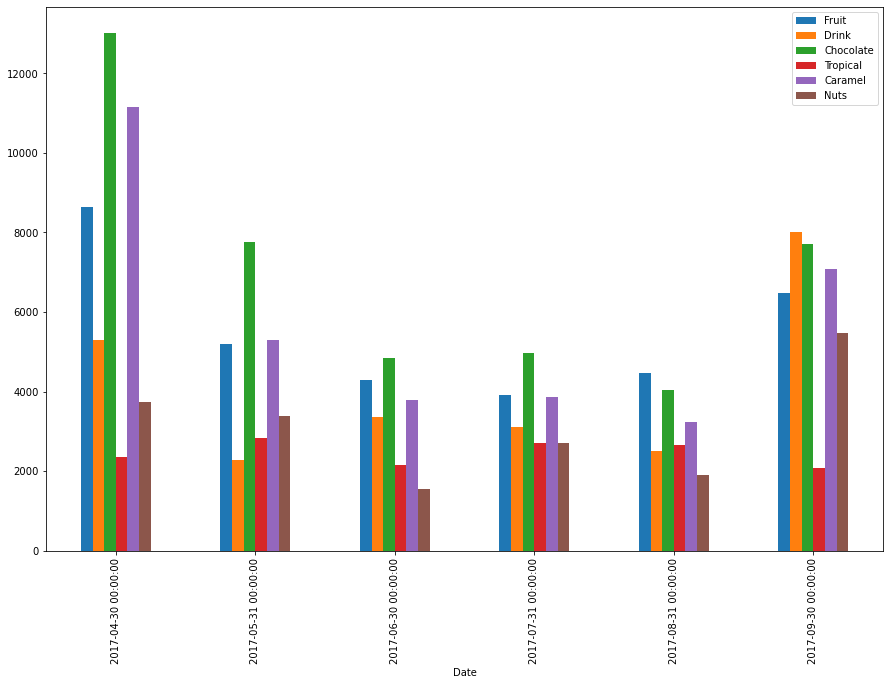

In [116]:
import matplotlib.pyplot as plt

daily_students.groupby(pd.Grouper(freq='M', key='Date')).sum().plot( y=["Fruit", "Drink", "Chocolate", "Tropical", "Caramel", "Nuts"], kind="bar", figsize=(15,10))


# Toppings 

1 toppings is the popular choice except for month 3 where 3 toppings are more popular

<AxesSubplot:xlabel='Date'>

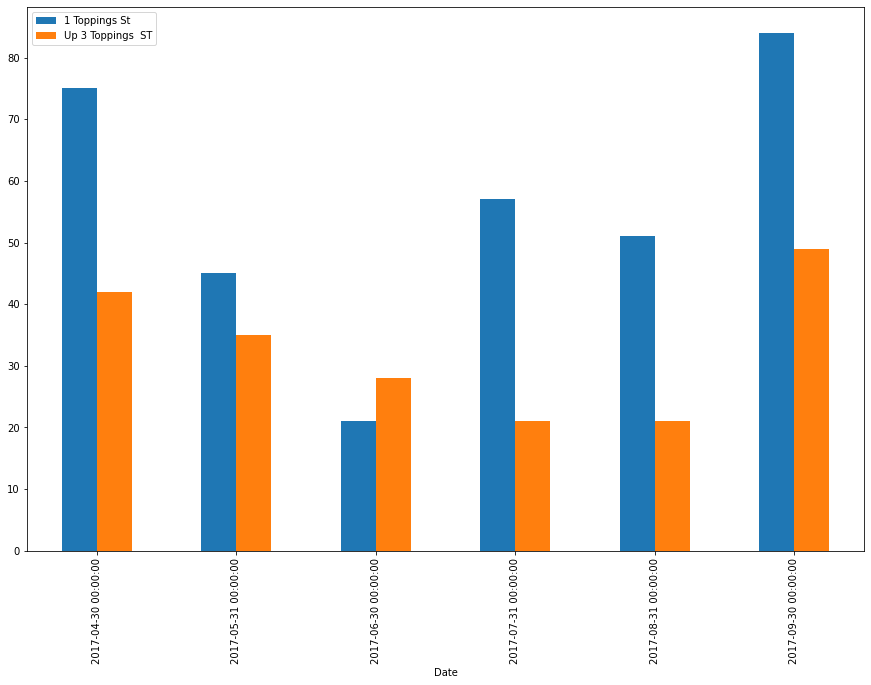

In [117]:
daily_students.groupby(pd.Grouper(freq='M', key='Date')).sum().plot( y=["1 Toppings St", "Up 3 Toppings  ST"], kind="bar", figsize=(15,10))


# Looking at flavours individually vs groups

The management is correct that different groups perform better in diffrent times of months as noted and discussed in visualizations above.

For analysis looking at flavours in group and individually both give valuable insights and should be looked at collectiely. Looking at groups gives a better overview and direct comparison between types of flavours, whereas looking indivually allows us to better understand exactly what flavours are the most popular as their might be some flavours in a group which are not selling but because of another flavour in the group which is very popular, that flavour might be overlooked and thought of as selling. Therefore it is important to analyze groups and look into the groups to see what flavours are popular within the groups. 

Individually we can see that chocolate is the most popular flavour, followed by caramel for the first few months. 

<AxesSubplot:xlabel='Date'>

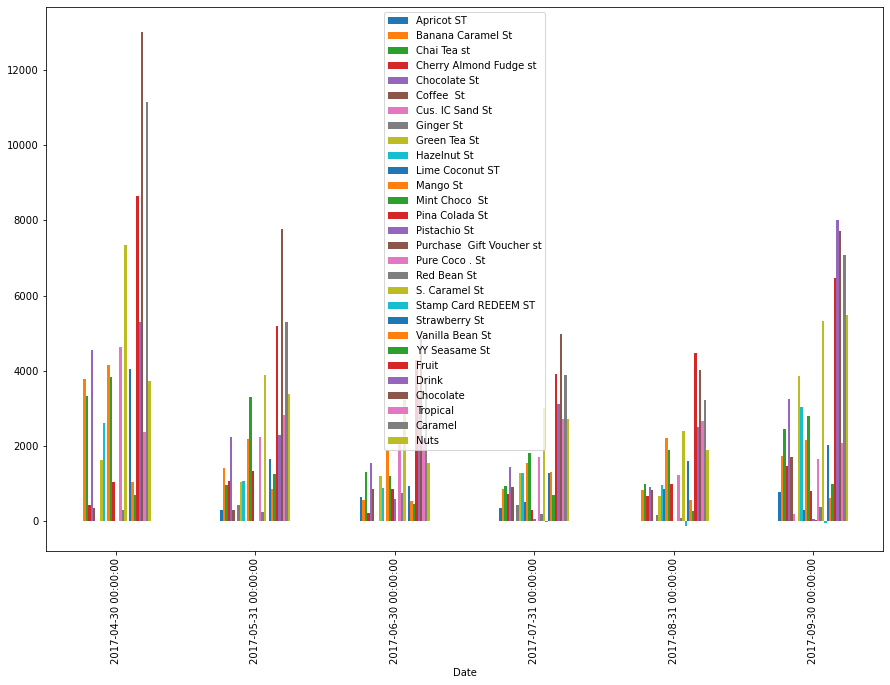

In [125]:

daily_students.groupby(pd.Grouper(freq='M', key='Date')).sum().plot( y=['Apricot ST', 'Banana Caramel St',
       'Chai Tea st', 'Cherry Almond Fudge st', 'Chocolate St', 'Coffee  St',
       'Cus. IC Sand St', 'Ginger St',
       'Green Tea St', 'Hazelnut St', 'Lime Coconut ST',
       'Mango St', 'Mint Choco  St', 'Pina Colada St', 'Pistachio St',
       'Purchase  Gift Voucher st', 'Pure Coco . St', 'Red Bean St',
       'S. Caramel St', 'Stamp Card REDEEM ST',
       'Strawberry St', 'Vanilla Bean St',
       'YY Seasame St', 'Fruit', 'Drink', 'Chocolate', 'Tropical', 'Caramel',
       'Nuts'], kind="bar", figsize=(15,10))


In [140]:
# same steps and reasoning repeated for tourism and staff
daily_staff.columns

Index(['Date', 'S. Caramel Staff', 'Mango Staff', 'Chocolate Staff',
       'Pure Coconut Staff', 'Mint Choco Staff', 'Strawberry Staff',
       'Waffle Cone Staff', 'Chai Tea Staff', 'Hezelnut Staff',
       'Green Tea Staff', 'Pina Colada Staff', 'Coffee Staff', 'Banana Staff',
       'YY Seasame Staff', 'Vanilla Bean Staff', 'Ice Cream Sand Staff',
       'Cherry Alm Staff', 'Apricot Staff', 'Red Bean Staff',
       'Lime Coconut Staff', 'Pistachio Staff', 'Ginger Staff',
       '1 Topping Staff', 'Cus IC Sand Staff', '3 Topping Staff',
       'Single Scoop Staff', 'Tub Staff', 'Triple Scoop Staff',
       'Double Scoop Staff', 'Drink', 'Chocolate', 'Fruit', 'Caramel', 'Nuts',
       'Tropical'],
      dtype='object')

In [138]:
daily_staff['Drink'] = daily_staff['Chai Tea Staff'] + daily_staff['Coffee Staff'] + daily_staff['Green Tea Staff']
daily_staff['Chocolate'] = daily_staff['Chocolate Staff'] + daily_staff['Mint Choco Staff'] 
daily_staff['Fruit'] = daily_staff['Apricot Staff'] + daily_staff['Mango Staff'] + daily_staff['Pistachio Staff'] + daily_staff['Strawberry Staff']
daily_staff['Caramel'] =  daily_staff['S. Caramel Staff'] 
daily_staff['Nuts'] =  daily_staff['YY Seasame Staff'] 
daily_staff['Tropical'] = daily_staff['Lime Coconut Staff'] + daily_staff['Pina Colada Staff'] + daily_staff['Red Bean Staff'] + daily_staff['Vanilla Bean Staff']  + daily_staff['Ginger Staff'] + daily_staff['Pure Coconut Staff']


# Flavour Groups Staff

Fruits and tropical are the most popular flavours for staff expect for second month where chocolate is marginally more popular. Nuts are the least popular group. In contrast chocolate and caramel is the favourite for students

<AxesSubplot:xlabel='Date'>

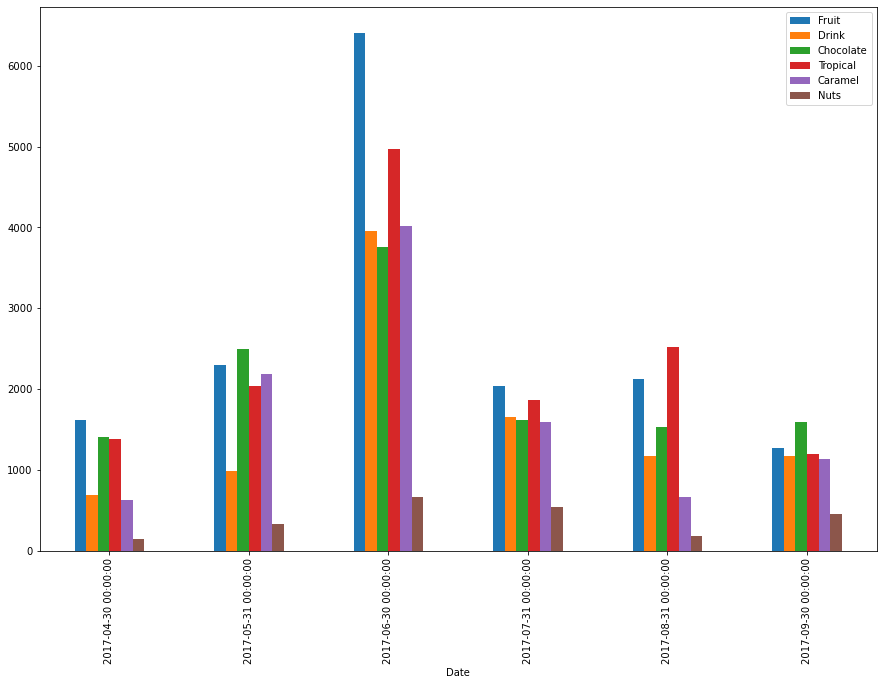

In [139]:
daily_staff.groupby(pd.Grouper(freq='M', key='Date')).sum().plot( y=["Fruit", "Drink", "Chocolate", "Tropical", "Caramel", "Nuts"], kind="bar", figsize=(15,10))


In [141]:
daily_tourism.columns

Index(['Date', 'Mango', 'Chocolate', 'Strawberry', 'S. Caramel', 'Pure Coco .',
       'Mint Choco', 'Waffle Cone', 'Green Tea', 'Hazelnut', 'Vanilla Bean',
       'Chai Tea', 'Pina Colada', 'Banana Caramel  /', 'Coffee',
       'Cherry Almond', 'YY Seasame', 'Lime Coconut', 'Chocoate Cookies',
       'Ice Cream SAND', 'Red Bean', 'Ginger', 'Miscellenous', 'Granola',
       'Apricot', '1 Topping', '3 Topping', 'Single Scoop', 'Tub Ice Cream',
       'Gift coupon 3 cone', 'Triple Scoop', 'Finger B 100', 'Double Scoop'],
      dtype='object')

In [145]:
daily_tourism['Drink'] = daily_tourism['Chai Tea'] + daily_tourism['Coffee'] + daily_tourism['Green Tea']
daily_tourism['Chocolate'] = daily_tourism['Chocolate'] + daily_tourism['Mint Choco'] 
daily_tourism['Fruit'] = daily_tourism['Apricot'] + daily_tourism['Mango'] +daily_tourism['Strawberry']
daily_tourism['Caramel'] =  daily_tourism['S. Caramel'] 
daily_tourism['Nuts'] =  daily_tourism['YY Seasame'] 
daily_tourism['Tropical'] = daily_tourism['Lime Coconut'] + daily_tourism['Pina Colada'] + daily_tourism['Red Bean'] + daily_tourism['Vanilla Bean']  + daily_tourism['Ginger'] 


# Flavour groups for tourism

Chocolate is the most popular group for tourism followed by Fruit

<AxesSubplot:xlabel='Date'>

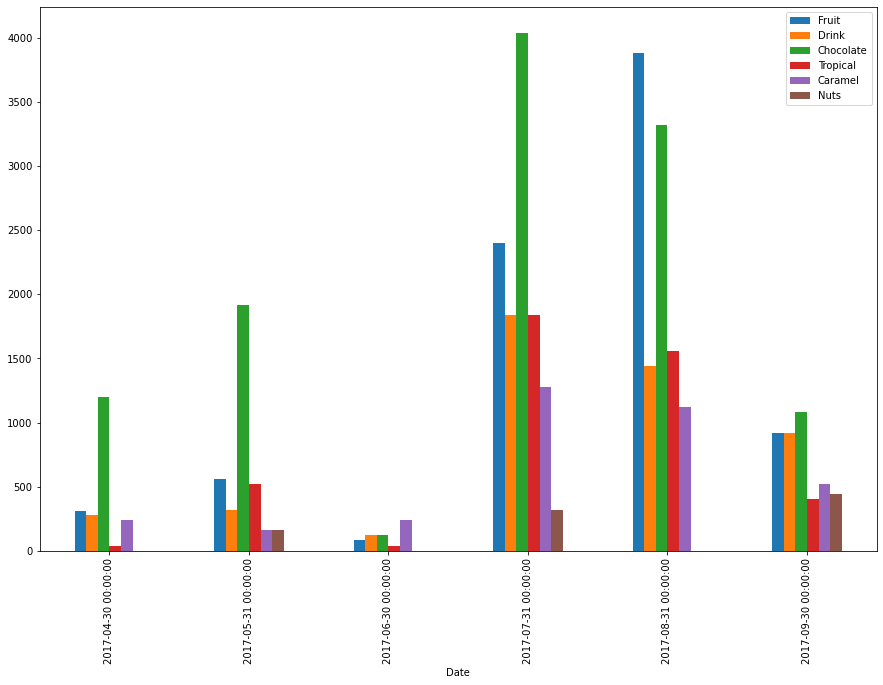

In [146]:
daily_tourism.groupby(pd.Grouper(freq='M', key='Date')).sum().plot( y=["Fruit", "Drink", "Chocolate", "Tropical", "Caramel", "Nuts"], kind="bar", figsize=(15,10))


# 4)

In [148]:
daily.describe()

,Sales
count,214.000000
mean,1444.035046
std,752.709611
min,0.000000
25%,1112.000000
50%,1402.000000
75%,1808.500000
max,3840.000000


In [151]:
hourly_ts.describe()

,Sales
count,5136.000000
mean,60.168127
std,127.541303
min,-31.000000
25%,0.000000
50%,0.000000
75%,57.000000
max,2150.000000


# Potential Outliers

The minimum sale amount is negative, this could only be case if the company is recording refunds as a transaction but assuming that is not the case these negative values are outliers

Furthermore the max sale amount of 2150 also seems high when compared to the mean and is likely a outlier

These outliers could be typos where a negative sign is added by mistake and a extra 0 is added to 215. We can convert the negatives to positive and remove the extra 0 from 2150. Alternatively we can replace these values with the mean of the month or forward / back fill them. 


# 5)

In [155]:
#In report

# 6)

In [162]:
daily

,Sales
Time,
2017-04-01,2348.00000
2017-04-02,0.00000
2017-04-03,3090.00000
2017-04-04,0.00000
2017-04-05,3840.00000
...,...
2017-10-27,761.00002
2017-10-28,1611.00000
2017-10-29,732.00000


In [174]:
X = X.reshape((X.shape[0], X.shape[1], 1))


In [175]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [177]:
X_train

array([[[1254.     ],
        [1793.     ],
        [ 776.     ],
        [1133.     ]],

       [[1159.     ],
        [1236.     ],
        [ 963.     ],
        [1629.     ]],

       [[ 701.     ],
        [1026.     ],
        [ 593.     ],
        [1160.     ]],

       [[1160.     ],
        [ 761.00002],
        [1611.     ],
        [ 732.     ]],

       [[1724.     ],
        [1749.     ],
        [1373.     ],
        [1601.     ]],

       [[3027.     ],
        [   0.     ],
        [1266.     ],
        [   0.     ]],

       [[1831.     ],
        [   0.     ],
        [1531.     ],
        [1247.     ]],

       [[1998.     ],
        [   0.     ],
        [1885.     ],
        [1724.     ]],

       [[1860.     ],
        [   0.     ],
        [1234.     ],
        [1217.99998]],

       [[1569.     ],
        [1746.     ],
        [1590.     ],
        [2627.     ]],

       [[1253.     ],
        [ 915.     ],
        [1634.     ],
        [3478.     ]],

       [[1

In [179]:
n_steps = 4
n_features = 1
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [180]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [181]:
model.fit(X_train, y_train, epochs=5, verbose=0)


In [182]:
ypred = model.predict(X_test, verbose=0)


In [193]:
y_test

array([1601.     ,  820.     , 2245.00002,  796.     ,    0.     ,
       1701.00002, 1393.     , 1447.     ,    0.     ,  617.     ,
       2657.     , 1059.     ,  732.     ,  776.     , 2836.     ,
       1294.     ,  563.     ,    0.     , 1366.     , 1460.     ,
       1159.     , 1145.     , 1144.     ,    0.     , 1785.     ,
       1852.     ,    0.     , 1793.     , 2853.     , 1843.     ,
       1367.     , 1535.     , 1243.     ,    0.     , 1210.     ,
       1549.     , 1573.     ,  915.     , 2355.     , 1489.     ,
        741.     , 1371.     , 1285.     , 1634.     ,  863.     ,
       1267.     , 2015.     , 2896.     , 1771.     , 1860.     ,
       1998.     , 1528.     , 1469.     , 1373.     , 1707.     ,
       1471.     , 1306.     , 2398.     , 2251.     , 2497.     ,
       1257.     ,  930.     , 3478.     ])

In [189]:
ypred = [y[0] for y in ypred]

In [190]:
ypred

[189.43639,
 131.75688,
 307.58734,
 61.29181,
 171.2935,
 112.928505,
 130.89804,
 324.8456,
 234.01854,
 175.13768,
 127.2138,
 149.63637,
 205.80313,
 138.5243,
 304.62518,
 257.84323,
 127.44425,
 450.1478,
 105.23852,
 126.25508,
 97.516495,
 196.0252,
 168.77174,
 139.47336,
 156.1194,
 205.24446,
 188.92943,
 184.95561,
 239.162,
 174.49068,
 128.89525,
 313.71942,
 640.8687,
 221.8302,
 311.03473,
 203.36098,
 261.82297,
 168.62682,
 282.69574,
 249.69006,
 34.362938,
 130.98375,
 250.36742,
 155.00545,
 66.569305,
 610.0705,
 248.28209,
 399.21063,
 331.73862,
 200.62749,
 223.0377,
 155.94014,
 339.11618,
 87.232254,
 161.42645,
 130.6345,
 290.66235,
 189.55168,
 377.11145,
 381.98352,
 203.26671,
 172.26784,
 218.01067]

In [191]:
from sklearn.metrics import r2_score

r2_score(y_test, ypred)

-2.5534470970665453

In [192]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ypred)

1987643.4198371805

In [195]:
# try random forest


In [198]:
X_train

array([[1254.     , 1793.     ,  776.     , 1133.     ],
       [1159.     , 1236.     ,  963.     , 1629.     ],
       [ 701.     , 1026.     ,  593.     , 1160.     ],
       [1160.     ,  761.00002, 1611.     ,  732.     ],
       [1724.     , 1749.     , 1373.     , 1601.     ],
       [3027.     ,    0.     , 1266.     ,    0.     ],
       [1831.     ,    0.     , 1531.     , 1247.     ],
       [1998.     ,    0.     , 1885.     , 1724.     ],
       [1860.     ,    0.     , 1234.     , 1217.99998],
       [1569.     , 1746.     , 1590.     , 2627.     ],
       [1253.     ,  915.     , 1634.     , 3478.     ],
       [1306.     ,    0.     , 1063.     , 1852.     ],
       [ 984.     , 1217.     , 1292.     , 1408.99998],
       [2627.     , 2029.     ,  984.     , 1469.     ],
       [2563.     , 2201.     , 1366.     , 1448.     ],
       [2251.     , 1294.     ,    0.     , 1159.     ],
       [2308.     , 1860.     ,    0.     , 1234.     ],
       [ 796.     ,  863.     ,

In [199]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)

regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [200]:
y_pred = regr.predict(X_test)

In [201]:
r2_score(y_test, y_pred)

-0.11669959609024327

In [202]:
mean_squared_error(y_test, y_pred)

624633.0797877763

In [203]:
#the random forest model has better r squared score and lower mse. Therefore we recommend the random forest model 